# Telco Churn Project

## Objectives: 

* To determine the drivers of churn from Telco customer data.

* Use found drivers in a ML model to make reccomendations to the shareholders of Telco.

## Wrangle Data:

* Data acquired from MySQL 'telco_churn' database.
* Dataframe was 7043 rows, 25 columns before cleaning (row:customers, columns: variables).
* SQL query customers data, joining relevant tables on shared IDs, creating function to convert to dataframe.
* Clean data by dropping irrelevant columns.
* Change monthly charges datatype to float
* Encode useful categorical variables, removing original non-encoded.
* Split data (train/val/test) at &asymp; (60/20/20).
* Split stratification left ambiguous per use. 

## Data Dictionary:


| Variable Name                         | Description                                                      |
|---------------------------------------|------------------------------------------------------------------|
| churn_encoded                         | Binary encoding of churn status (0: Not Churn, 1: Churn)         |
| monthly_charges                       | The monthly charges for the service  (float)                     |
| tenure                                | Number of months the customer has been with the company (int)    |
| gender_encoded                        | Binary encoding of customer gender (0: Female, 1: Male)          |
| dependents_encoded                    | Binary encoding of customer having dependents (0: No, 1: Yes)    |
| internet_service_type_Fiber optic     | Binary encoding if customer has fiber optic internet service     |
| ...                                   | Various other encoded values are present in the DataFrame        |



### Import:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from acquire_prep import prep_telco
from acquire_prep import my_train_test_split
from final_fx import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu


import warnings
warnings.filterwarnings("ignore")

## Explore:

In [2]:
# Create variable for df manipulation
df = prep_telco()

#### How many churn?

In [3]:
# Baseline count of churn
print(df['churn_encoded'].value_counts())

# Percent of baseline churn prediction
1869/(1869+5163)

0    5174
1    1869
Name: churn_encoded, dtype: int64


0.26578498293515357

26% of customers within Telco churn.

### Does contract type have a relationship with churn?

H<sub>0</sub> : Contract type unrelated to churn

H<sub>A</sub> : Contract type is related to churn

<function matplotlib.pyplot.show(close=None, block=None)>

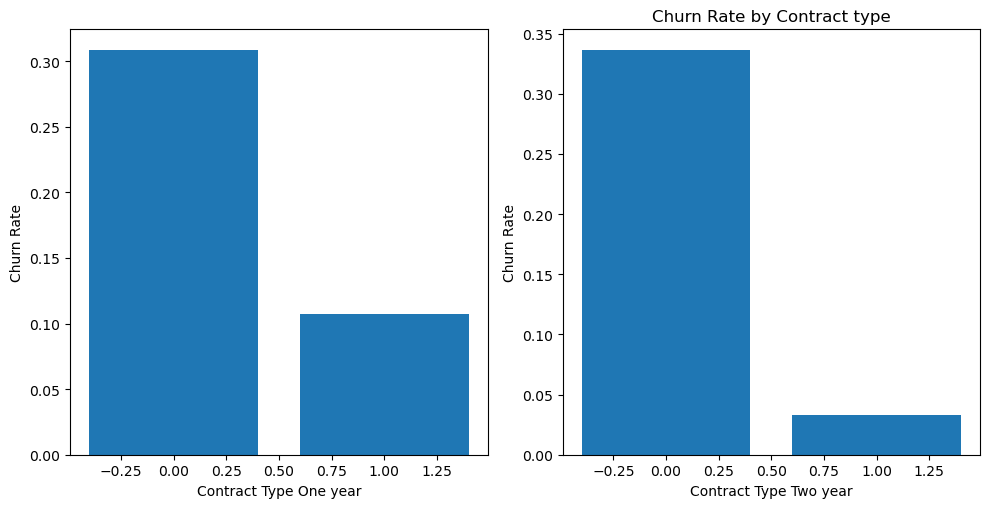

In [4]:
# call visualization modeling contract to churn rate
vis_1()

There is a higher margin of those with one year contracts that churn than two year.

###### Perform Chi2 to validate belief in relationship between contract type and churn

In [5]:
# call fx for analysis
chi_1()

Chi-squared statistic: 703.7870674341639
P-value: 1.4947896745220748e-153
Degrees of freedom: 2
Expected frequencies:
 [[ 670.75786982  242.24213018]
 [ 731.00118343  263.99881657]
 [1702.24094675  614.75905325]]


From the above Chi2 test:

p < a  &there4;  H<sub>0</sub> is rejected, establishing a relationship between the feature and target.

### Is the monthly bill related to churn?

H<sub>0</sub> : No significant relationship.

H<sub>A</sub> : Bill amount significantly related to churn.

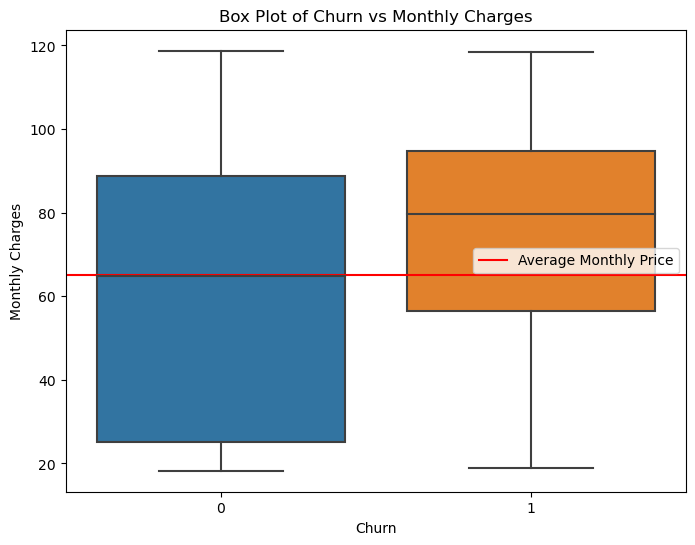

In [6]:
# call visualization
vis_2()

Of those who churn, more seem to be paying a higher than average monthly bill.

###### Perform chi2 to validate belief in relationship between monthly charges and churn

In [7]:
# call fx for analysis
chi_2()

Chi-squared statistic: 2123.609130
P-value: 0.000000
Degrees of freedom: 1584
Expected frequencies:
 [[0.73463013 0.26536987]
 [0.73463013 0.26536987]
 [0.73463013 0.26536987]
 ...
 [1.46926026 0.53073974]
 [0.73463013 0.26536987]
 [0.73463013 0.26536987]]


From the above Chi2 test:
Strong Chi stat. 

p < a  &there4;  H<sub>0</sub> is rejected, establishing a relationship between feature and target.

### Of those paying higher than average monthly, do they have fiber optic?

H<sub>0</sub> : No significant relationship.

H<sub>A</sub> : Higher bill significantly related to fiber optic.

###### Perform mann-whitney to validate belief in relationship between monthly charges and fiber optic

In [8]:
# call fx for analysis
m_w_1()

Mann-Whitney U test statistic: 11789456.0
P-value: 0.0
Average monthly charge (Fiber optic): 91.5001291989665
Average monthly charge (Non-Fiber optic): 43.78824423612869


From the above Mann Whitney test:
Strong test stat. 

AVG monthly charge (ID as driver of churn) corresponds to paying for fiber optic internet.

p < a  &there4;  H<sub>0</sub> is rejected, establishing a relationship between feature and target.

### Is tenure related to churn?

H<sub>0</sub> : No significant relationship.

H<sub>A</sub> : Tenure duration significantly related to churn.

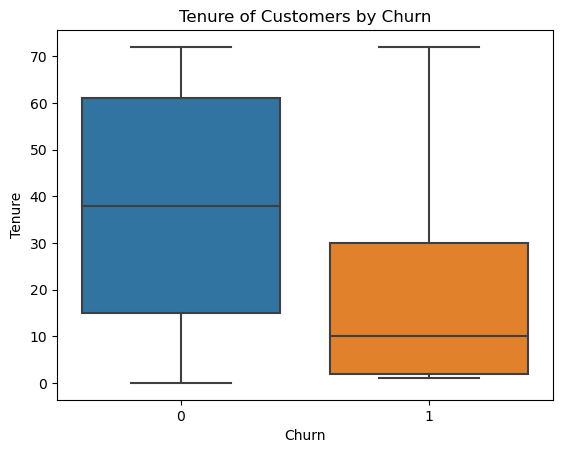

In [9]:
# call visualization
vis_3()

It would appear at a glance those more likely to churn are those with the company less time overall.

###### Perform Mann-Whitney to validate belief in relationship between tenure and churn

In [10]:
# call fx for analysis
m_w_2()

Mann-Whitney U test statistic: 2515538.0
P-value: 2.419635517951866e-208


From the above Mann Whitney test:
Strong test stat. 

p < a  &there4;  H<sub>0</sub> is rejected, establishing a relationship between feature and target.

#### Explore Summary:
* Primary drivers of churn are contract type, tenure and monthly bill. 
* Explore revealed of those churning from bill, having fiber optic service was correlated. 

## Model:

* Accuracy will be the primary evaluation metric.
* Baseline accuracy from explore revealed to be 26% prediction of churn.

In [11]:
# call fx for assessing model strengths and comparison on train data.
model_fx()

Accuracy of Log. Reg. object on train set: 0.784
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3104
           1       0.62      0.48      0.54      1121

    accuracy                           0.78      4225
   macro avg       0.72      0.69      0.70      4225
weighted avg       0.77      0.78      0.77      4225

Accuracy of DT object on train set: 0.787
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3104
           1       0.68      0.38      0.48      1121

    accuracy                           0.79      4225
   macro avg       0.74      0.66      0.68      4225
weighted avg       0.77      0.79      0.76      4225

Accuracy of random forest classifier on training set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3104
           1       0.64      0.54      0.58      1121

    accuracy                    

We can see that the RF performs the best on the training data, with log. reg. coming in close and KNN performing slightly worse than that. 

In [12]:
# call fx for assessing model strengths and comparison on validate data.
model_fx_v()

Accuracy of Log. Reg. object on train set: 0.792
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy of DT object on train set: 0.786
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.69      0.42      0.52       374

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409

Accuracy of random forest classifier on training set: 0.82
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.69      0.55      0.61       374

    accuracy                    

RF again outperforms the other models with an accuracy of 82%, with KNN close behind at 80% and log. reg. now last.

#### Test:

In [13]:
model_fx_t()

Accuracy of random forest classifier on training set: 0.83
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1035
           1       0.72      0.56      0.63       374

    accuracy                           0.83      1409
   macro avg       0.79      0.74      0.76      1409
weighted avg       0.82      0.83      0.82      1409



#### Model Summary:
* RF performs best on train(80%) and validate(82%) sets. 
* KNN is a close second. (78%)/(80%). Adjusting hyperparameters might yield a more accurate model than RF. 
* Logisitic regression is powerful and would no doubt outpace the others with more tuning of the features.
* RF model performs at 83% Accuracy on test set. 

## Conclusion:

##### Drivers:
* tenure
* contract type
* monthly bill higher than average (whether theyre paying for fiber optic included)

###### Models:
* RF best prediction tool currently, KNN close second.
* Log. Reg. could outperform with more manipulation.

###### Recc. to shareholders:
* Upgrade fiber optic service quality or lower price.

## Next:
Afforded more time, I would experiment with adding more relevant features into a regression model to attempt beating the RF accuracy. 
I would also experiment more with demographic data to attempt and discern actionable patterns and relationships.